In [1]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
image_path = "1.jpeg"
IMG_width, IMG_height = 256,256

In [3]:
image = Image.open(image_path)
image = image.resize((IMG_width, IMG_height))

In [4]:
def random_flip(img):
    """Randomly flips an image horizontally."""
    if random.random() > 0.5:
        return img.transpose(Image.FLIP_LEFT_RIGHT)
    return img

In [5]:
def random_rotate(img):
    """Rotates an image by a random angle between -30 and 30 degrees."""
    angle = random.uniform(-30, 30)
    return img.rotate(angle, expand=False, fillcolor='white')

In [6]:
def color_jitter(img):
    """Randomly changes brightness, contrast, and saturation."""
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(random.uniform(0.7, 1.3)) # Brightness
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(random.uniform(0.7, 1.3)) # Contrast
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(random.uniform(0.7, 1.3)) # Saturation
    return img


In [7]:
def random_zoom(img, zoom_factor=0.2):
    """Zooms into a random part of the image."""
    w, h = img.size
    zoom_w = int(w * (1 - zoom_factor))
    zoom_h = int(h * (1 - zoom_factor))
    
    left = random.randint(0, w - zoom_w)
    top = random.randint(0, h - zoom_h)
    right = left + zoom_w
    bottom = top + zoom_h
    
    cropped = img.crop((left, top, right, bottom))
    return cropped.resize((w, h))

(-0.5, 255.5, 255.5, -0.5)

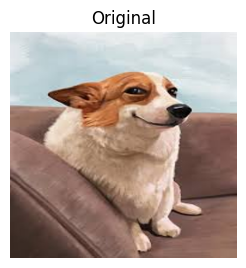

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

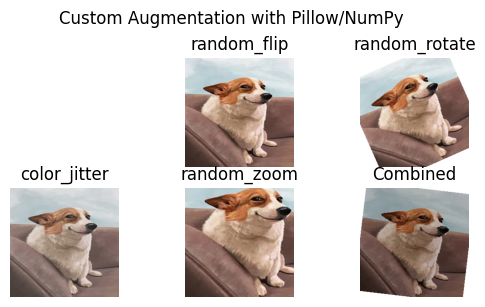

In [9]:
augmentations = [random_flip, random_rotate, color_jitter, random_zoom]
for i, aug_func in enumerate(augmentations):
    augmented_image = aug_func(image)
    plt.subplot(3, 3, i + 2)
    plt.imshow(augmented_image)
    plt.title(aug_func.__name__)
    plt.axis("off")

# Plot a combined augmentation
combined_img = random_rotate(color_jitter(random_flip(image)))
plt.subplot(3, 3, 6)
plt.imshow(combined_img)
plt.title("Combined")
plt.axis("off")

plt.suptitle("Custom Augmentation with Pillow/NumPy")
plt.show()